# <font color=Green>CLASSIFICATION ASSIGNMENT 3 - ADVERTISING DATASET</font>

indexes that follows in the order are as below:-

<font color=Green>(A) Load the dataset and print the metadata in the notebook

(B)	Pre-process data & create a heatmap to check NULL values

(C)	filter analysis using pearson's coorelation

(D)	feature building and model building diagnostics

    1. Perform stratified splitting of train and test data
    2. Build a classifier model using the Decision Tree algorithm
    3. Print confusion matrix and classification report before and after pruning the Decision tree
    4. Plot the final decision tree model
    5. Find out the stratified cross-validation accuracy


</font>




In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import seaborn as sns
from matplotlib import style
#import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from tkinter import *
from tkinter.font import Font
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tqdm import tqdm 
from math import sqrt 
from time import gmtime, strftime
from datetime import datetime
%matplotlib inline

######## Capture the start time to check the runt ime of the whole notebook #########
startTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())

C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# <font color=Red>(A)	Load the dataset and print the metadata in the notebook </font>


In [2]:
#reading data from Cancer_Dataset.csv
    
df_final_data = pd.read_csv('advertising.csv')

print("File imported and data frame created")


File imported and data frame created


In [3]:
df_final_data  # this is final data set to be pre processed.

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [4]:
df_final_data.dtypes # all the  ATTRIBUTES  listed here  where all are continuous variables


Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [5]:
# let's have a look at how many labels each variable has

for col in df_final_data.columns:
    print(col, ': ', len(df_final_data[col].unique()), ' labels')

Daily Time Spent on Site :  900  labels
Age :  43  labels
Area Income :  1000  labels
Daily Internet Usage :  966  labels
Ad Topic Line :  1000  labels
City :  969  labels
Male :  2  labels
Country :  237  labels
Timestamp :  1000  labels
Clicked on Ad :  2  labels


In [6]:
# let's describe the data 
df_final_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# <font color=Red>(B)	Pre-process data & create a heatmap to check NULL values</font>




In [7]:
df_final_data.isnull() # checking null values in data set

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [8]:
df_final_data.isnull().sum() 

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [9]:
print("\n\nIs any null value present before replacing the missing values:  ",df_final_data.isnull().values.any())



Is any null value present before replacing the missing values:   False


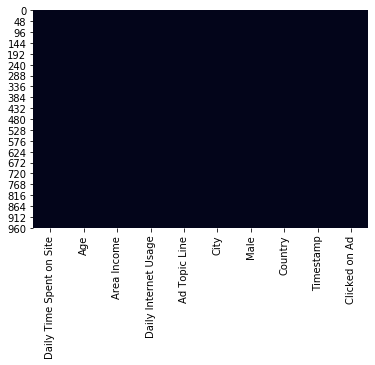

In [10]:
sns.heatmap(df_final_data.isnull(), cbar=False)

In [11]:
######## Manage missing values and replace by mean to keep the data consistent ########

for column in df_final_data:
    if column != 'Clicked on Ad' and df_final_data[column].dtypes != 'object':
        print("\n mean of column: {} is {}".format(column,df_final_data[column].mean()))
        df_final_data[column].replace(np.nan, df_final_data[column].mean(), inplace = True)
print("\n\nMissing values if any replaced by mean")
print("\n\nIs any null value present after replacing the missing values:  ",df_final_data.isnull().values.any())
df_final_data.isnull().sum() 


 mean of column: Daily Time Spent on Site is 65.00020000000012

 mean of column: Age is 36.009

 mean of column: Area Income is 55000.00008000003

 mean of column: Daily Internet Usage is 180.00010000000003

 mean of column: Male is 0.481


Missing values if any replaced by mean


Is any null value present after replacing the missing values:   False


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [12]:
df_final_data.duplicated() # checking duplicate data

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [13]:
df_final_data[df_final_data.duplicated()] # checking if there is any duplicate entry or not.

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad


In [14]:
######## Drop duplicate rows whereever found  ########
df_final_data.drop_duplicates(keep='first',inplace=True) 
print("\n\nlength of dataframe after dropping duplicates:",len(df_final_data))
df_final_data[df_final_data.duplicated()]



length of dataframe after dropping duplicates: 1000


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad


In [15]:
df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 85.9+ KB


In [16]:
# checking for unique values for all the variables.
def show_unique_values(data_frame):
    print("Unique value for dataset attributes :\n")
    for column in data_frame.columns:
        print(column, " " ,data_frame[column].unique(), "\n")   

In [17]:
show_unique_values(df_final_data)

Unique value for dataset attributes :

Daily Time Spent on Site   [68.95 80.23 69.47 74.15 68.37 59.99 88.91 66.   74.53 69.88 47.64 83.07
 69.57 79.52 42.95 63.45 55.39 82.03 54.7  74.58 77.22 84.59 41.49 87.29
 41.39 78.74 48.53 51.95 70.2  76.02 67.64 86.41 59.05 55.6  57.64 84.37
 62.26 65.82 50.43 38.93 84.98 64.24 82.52 81.38 80.47 37.68 69.62 85.4
 44.33 48.01 73.18 79.94 33.33 50.33 62.31 80.6  65.19 44.98 77.63 41.82
 85.61 85.84 72.08 86.06 45.96 62.42 63.89 35.33 75.74 78.53 46.13 69.01
 55.35 33.21 38.46 64.1  49.81 82.73 56.14 55.13 78.11 73.46 56.64 68.94
 70.79 57.76 77.51 52.7  57.7  56.89 69.9  55.79 70.03 50.08 43.67 72.84
 45.72 39.94 35.61 79.71 63.6  89.91 68.18 66.49 80.49 72.23 42.39 47.53
 74.02 66.63 63.24 71.   69.   76.99 72.6  61.88 84.45 88.97 86.19 49.58
 77.65 37.75 62.33 79.57 80.31 89.05 70.41 67.36 46.98 41.67 51.24 75.7
 43.49 49.89 38.37 38.52 71.89 75.8  83.86 37.51 83.67 69.08 37.47 56.04
 70.92 49.78 68.61 58.18 78.54 37.   65.4  87.98 44.64 41.73

 66193.81 66200.96 63126.96 71384.57 67782.17 42415.72 41920.79 29875.8 ] 

Daily Internet Usage   [256.09 193.77 236.5  245.89 225.58 226.74 208.36 131.76 221.51 183.82
 122.02 230.87 113.12 214.23 143.56 140.64 129.41 187.53 118.39 135.51
 224.44 226.54 164.83 209.93 167.22 204.79 134.14 129.23 119.2  209.82
 267.01 207.48 169.23 212.58 133.81 201.58 125.45 221.94 119.32 162.08
 202.61 252.36 198.11 212.3  204.86 172.83 202.25 198.72 123.72 119.93
 196.71 225.29 193.58 133.2  119.3  177.55 150.61 129.31 239.22 156.36
 183.43 192.93 169.5  178.92 141.22 198.5  105.22 200.22 215.25 131.72
 139.01 222.63 153.17 167.07 145.98 215.93 120.06 238.99 113.53 111.71
 209.25 222.75 115.91 138.71 184.1  105.15 200.55 118.6  109.07 109.29
 138.35 149.67 227.72 125.85 166.29 238.63 154.02 156.3  158.22 211.65
 169.18 235.28 194.23 218.17 202.16 229.12 241.03 150.99 135.18 210.54
 176.98 235.78 211.87 123.64 221.21 244.34 162.95 112.19 207.18 152.49
 210.26 231.94 212.79 225.24 127.11 230.93 127.07

 'Virtual 5thgeneration emulation'] 

City   ['Wrightburgh' 'West Jodi' 'Davidton' 'West Terrifurt' 'South Manuel'
 'Jamieberg' 'Brandonstad' 'Port Jefferybury' 'West Colin' 'Ramirezton'
 'West Brandonton' 'East Theresashire' 'West Katiefurt' 'North Tara'
 'West William' 'New Travistown' 'West Dylanberg' 'Pruittmouth'
 'Jessicastad' 'Millertown' 'Port Jacqueline' 'Lake Nicole' 'South John'
 'Pamelamouth' 'Harperborough' 'Port Danielleberg' 'West Jeremyside'
 'South Cathyfurt' 'Palmerside' 'West Guybury' 'Phelpschester'
 'Lake Melindamouth' 'North Richardburgh' 'Port Cassie' 'New Thomas'
 'Johnstad' 'West Aprilport' 'Kellytown' 'Charlesport' 'Millerchester'
 'Mackenziemouth' 'Zacharystad' 'North Joshua' 'Bowenview' 'Jamesberg'
 'Lake Cassandraport' 'New Sharon' 'Johnport' 'Hamiltonfort'
 'West Christopher' 'Hollandberg' 'Odomville' 'East Samanthashire'
 'South Lauraton' 'Amandahaven' 'Thomasview' 'Garciaside'
 'Port Sarahshire' 'Port Gregory' 'Brendachester' 'Lake Amy'
 'Lake Annashire'

 'Nicholasland' 'Duffystad' 'New Darlene' 'South Jessica' 'Ronniemouth'] 

Male   [0 1] 

Country   ['Tunisia' 'Nauru' 'San Marino' 'Italy' 'Iceland' 'Norway' 'Myanmar'
 'Australia' 'Grenada' 'Ghana' 'Qatar' 'Burundi' 'Egypt'
 'Bosnia and Herzegovina' 'Barbados' 'Spain' 'Palestinian Territory'
 'Afghanistan' 'British Indian Ocean Territory (Chagos Archipelago)'
 'Russian Federation' 'Cameroon' 'Korea' 'Tokelau' 'Monaco' 'Tuvalu'
 'Greece' 'British Virgin Islands' 'Bouvet Island (Bouvetoya)' 'Peru'
 'Aruba' 'Maldives' 'Senegal' 'Dominica' 'Luxembourg' 'Montenegro'
 'Ukraine' 'Saint Helena' 'Liberia' 'Turkmenistan' 'Niger' 'Sri Lanka'
 'Trinidad and Tobago' 'United Kingdom' 'Guinea-Bissau' 'Micronesia'
 'Turkey' 'Croatia' 'Israel' 'Svalbard & Jan Mayen Islands' 'Azerbaijan'
 'Iran' 'Saint Vincent and the Grenadines' 'Bulgaria' 'Christmas Island'
 'Canada' 'Rwanda' 'Turks and Caicos Islands' 'Norfolk Island'
 'Cook Islands' 'Guatemala' "Cote d'Ivoire" 'Faroe Islands' 'Ireland'
 'Moldova' 

 '2016-06-03 21:43:21'] 

Clicked on Ad   [0 1] 



In [18]:
# checking for missing  values for all the variables.
def show_missing_values(data):
    missing_data = data.isnull()
    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")

In [19]:
show_missing_values(df_final_data)

Daily Time Spent on Site
False    1000
Name: Daily Time Spent on Site, dtype: int64

Age
False    1000
Name: Age, dtype: int64

Area Income
False    1000
Name: Area Income, dtype: int64

Daily Internet Usage
False    1000
Name: Daily Internet Usage, dtype: int64

Ad Topic Line
False    1000
Name: Ad Topic Line, dtype: int64

City
False    1000
Name: City, dtype: int64

Male
False    1000
Name: Male, dtype: int64

Country
False    1000
Name: Country, dtype: int64

Timestamp
False    1000
Name: Timestamp, dtype: int64

Clicked on Ad
False    1000
Name: Clicked on Ad, dtype: int64



In [20]:

df_final_data_1=df_final_data.copy()
df_final_data_2=df_final_data.copy()


In [21]:
df_final_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# preprocessing steps for filter analysis

In [22]:


##### Normalize and Standardize values #####

#df_final_data_1['Timestamp'] = df_final_data_1['Timestamp'] / np.timedelta64(1, 'D')
df_final_data_1['Timestamp'] = pd.to_datetime(df_final_data_1['Timestamp'])
df_final_data_1['Timestamp'] = df_final_data_1['Timestamp'].map(dt.datetime.toordinal)

scaler = StandardScaler()
for column in df_final_data_1:
    if column != 'Clicked on Ad' and column != 'Male' and df_final_data[column].dtypes != 'object':
        df_final_data_1[[column]] = scaler.fit_transform(df_final_data_1[[column]])



######## Label Encode Categorical Variables #########

# creating instance of labelencoder
labelencoder = LabelEncoder()

df_final_data_1["City"] = labelencoder.fit_transform(df_final_data_1['City'])
df_final_data_1["Country"] = labelencoder.fit_transform(df_final_data_1['Country'])

######## Drop the ad topic line column as it is not useful ########

df_final_data_1.drop("Ad Topic Line", axis = 1, inplace=True) 

##### copy the transformed dataset into another dataframe #####

df_final_data_2=df_final_data_1.copy()

print("\n\nHead data of 1st dataframe copy post scaling & encoding\n\n",df_final_data_1.head(5))



Head data of 1st dataframe copy post scaling & encoding

    Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                  0.249267 -0.114905     0.509691              1.734030   
1                  0.961132 -0.570425     1.002530              0.313805   
2                  0.282083 -1.139826     0.356949              1.287589   
3                  0.577432 -0.798185    -0.014456              1.501580   
4                  0.212664 -0.114905     1.408868              1.038731   

   City  Male  Country  Timestamp  Clicked on Ad  
0   961     0      215     736050              0  
1   903     1      147     736058              0  
2   111     0      184     736036              0  
3   939     1      103     735973              0  
4   805     0       96     736118              0  


# <font color=Red>(C)	CHECK PEARSON'S CORRELATION FOR FILTER ANALYSIS </font>

<font color=green>IT IS ALWAYS GOOD TO PERFORM DESCRIPTIVE ANALYTICS BEFORE MOVING TO BUILDING A PREDICTIVE ANALYTICS MODEL. IT WILL HELP TO UNDERSTAND THE VARIABILITY IN THE MODEL. IT ALSO HELPS IN IDENTIFYING THE RELATIONSHIP BETWEEN THE VARIABLES PRESENT IN THE DATASET.

</font>




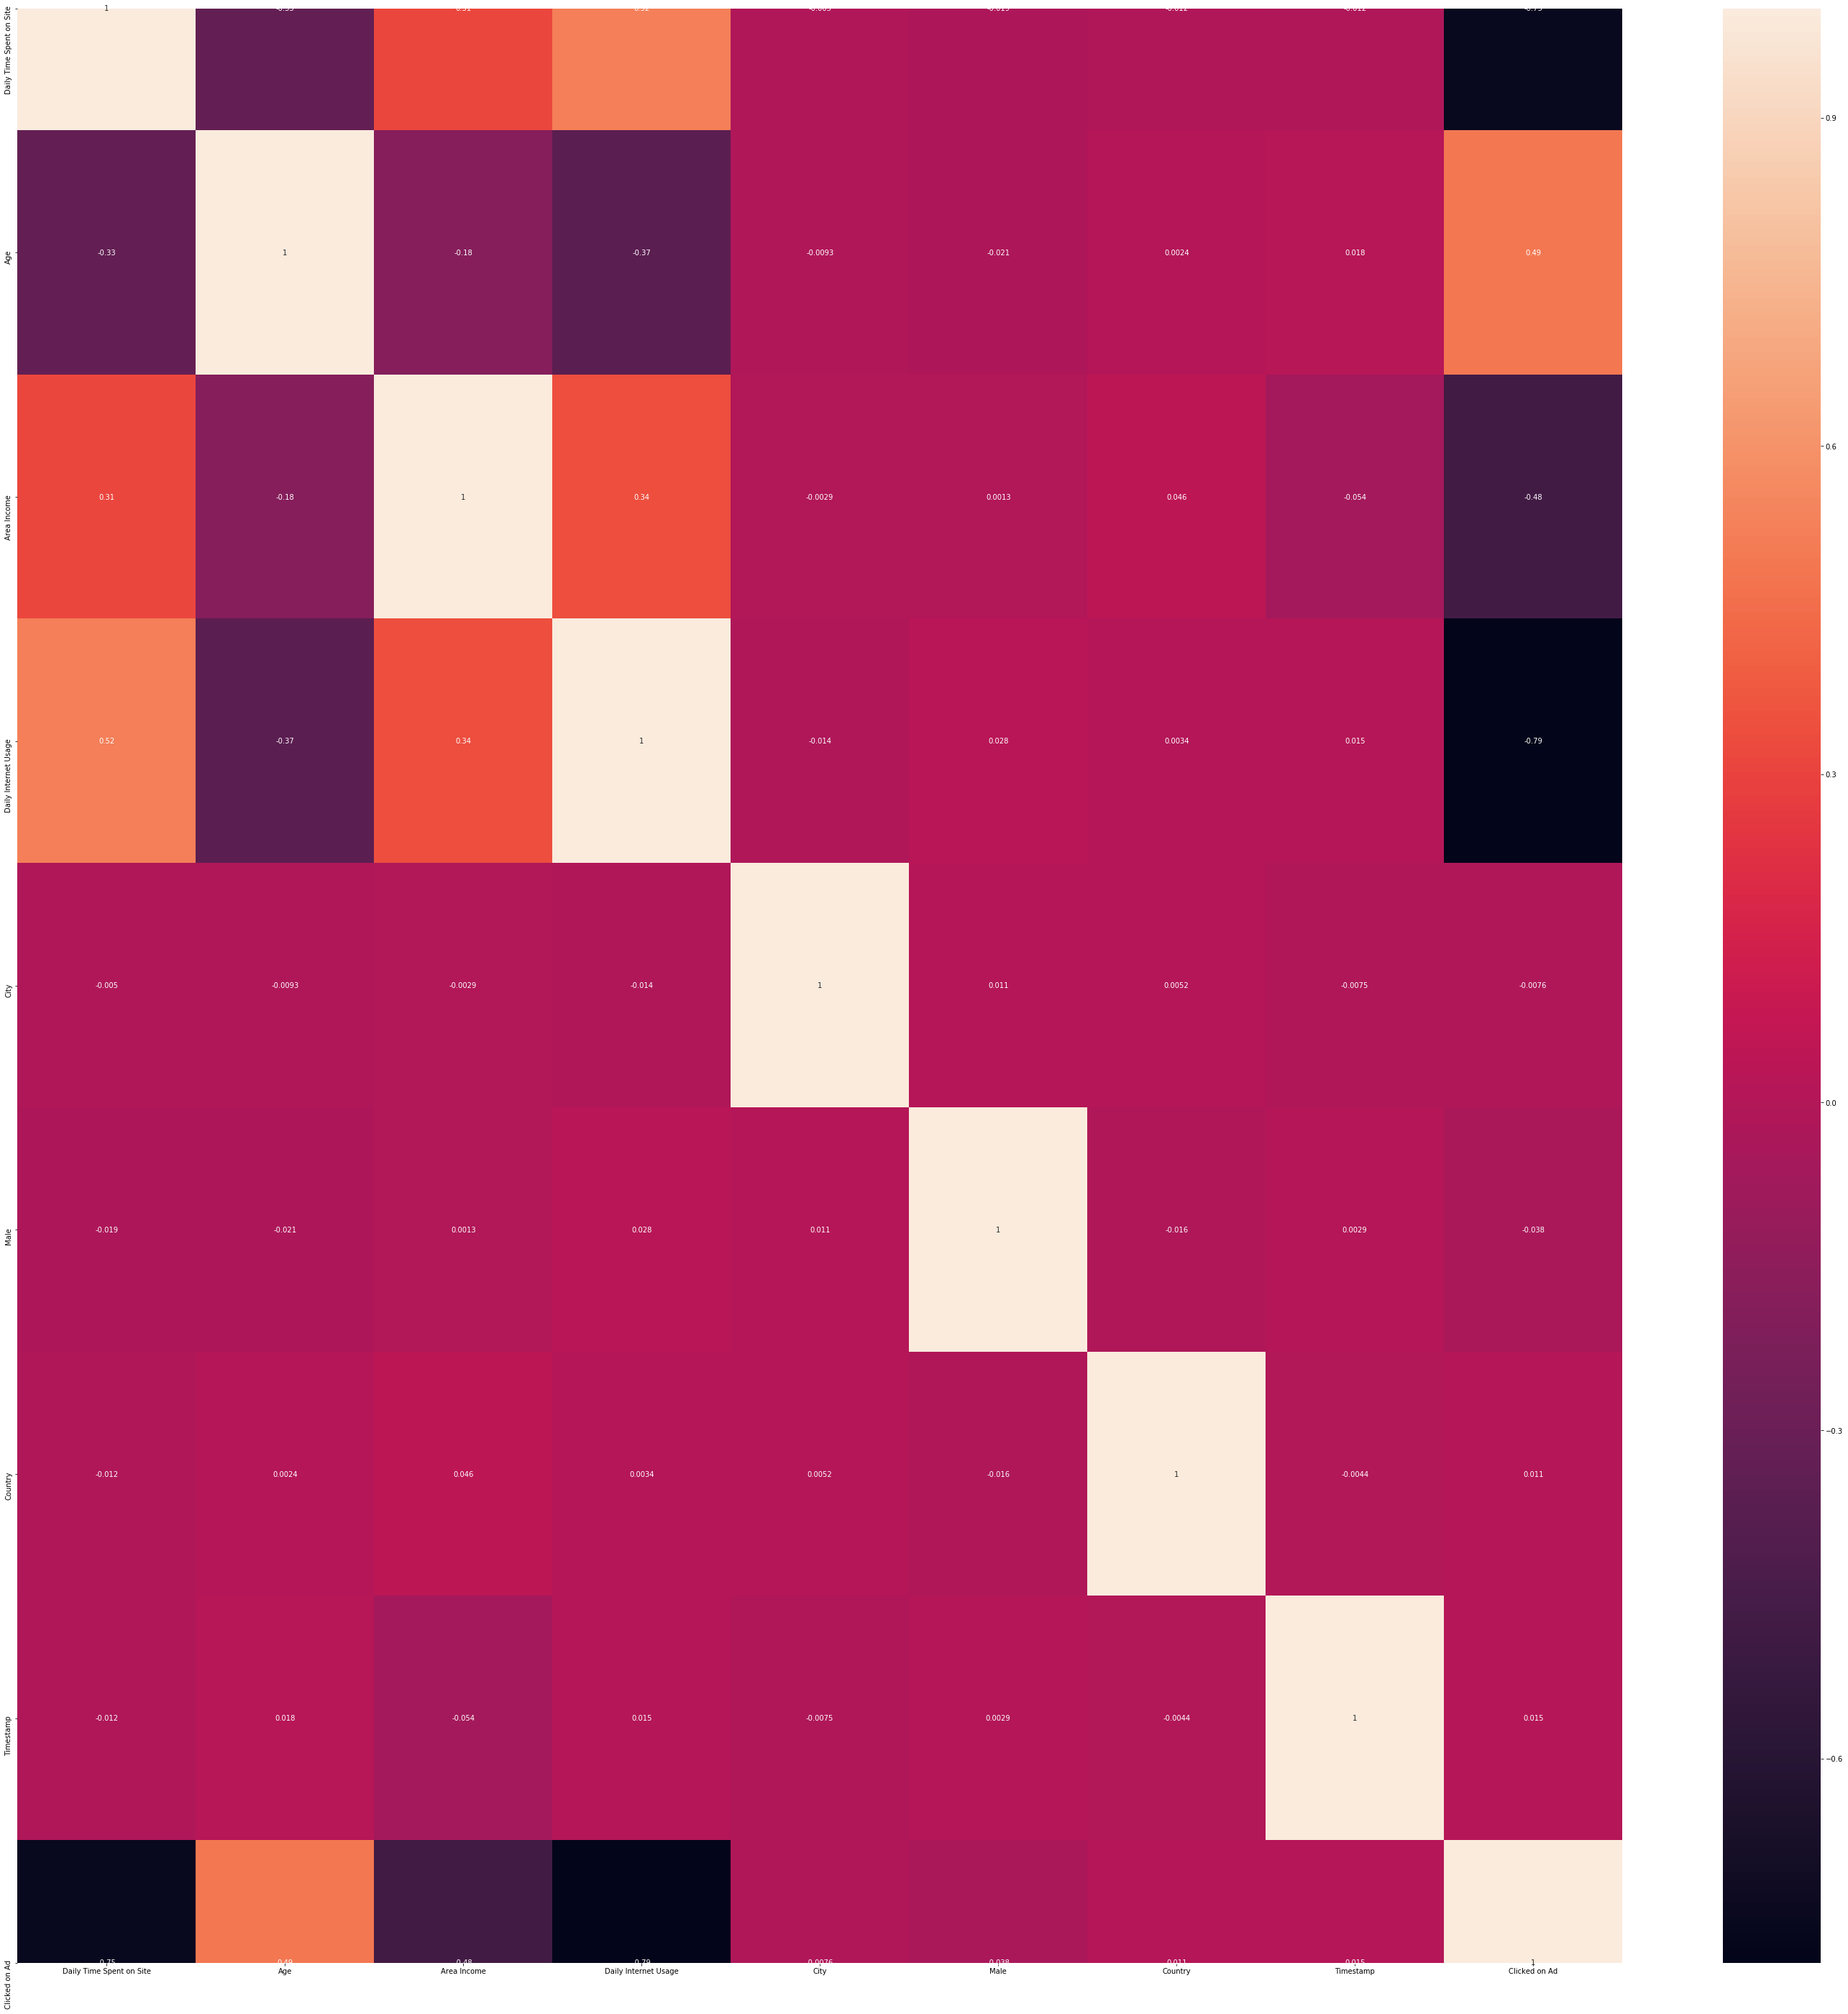

In [23]:
######## Check feature correlation #########

plt.figure(figsize=(50,50))
snplot = sns.heatmap(df_final_data_1.corr(), annot=True)
plt.show()
snplot.get_figure().savefig('TransformedFeaturesPearsonCorrelation.pdf')

In [24]:
df_final_data.describe() 

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# From the above analysis , it is confirmed that Daily Time Spent on Site,	Age	Area ,Income,	Daily Internet Usage have the highest correlation with Clicked on Ad

# <font color=Red>(D)FEATURE ENGINEERING & MODEL BUILDINGAND DIAGNOSTICS </font>

<font color=green>
    1. Perform stratified splitting of train and test data
    2. Build a classifier model using the Decision Tree algorithm
    3. Print confusion matrix and classification report before and after pruning the Decision tree
    4. Plot the final decision tree model
    5. Find out the stratified cross-validation accuracy
</font>






In [25]:
# find and remove correlated features with a given threshold
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df_final_data_1.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [26]:
correlation(df_final_data.iloc[:,:-1],0.8) 

set()

# <font color=Red>From the above analysis , it is clear that no feature has high correlation between one another with threshold as 0.8</font>

In [27]:
df_final_data_1

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Timestamp,Clicked on Ad
0,0.249267,-0.114905,0.509691,1.734030,961,0,215,736050,0
1,0.961132,-0.570425,1.002530,0.313805,903,1,147,736058,0
2,0.282083,-1.139826,0.356949,1.287589,111,0,184,736036,0
3,0.577432,-0.798185,-0.014456,1.501580,939,1,103,735973,0
4,0.212664,-0.114905,1.408868,1.038731,805,0,96,736118,0
...,...,...,...,...,...,...,...,...,...
995,0.502963,-0.684305,1.222006,0.651314,126,1,116,736005,1
996,-0.864601,1.023896,0.953329,-1.038735,488,1,26,736076,1
997,-0.843775,1.707176,-0.938570,-1.358924,798,1,140,735995,1
998,-0.596389,-1.936986,-0.975484,0.181172,935,0,85,736047,0


In [28]:
# Create accuracy score & model dict arrays to draw graph later #
accscore_arr = []
aucscore_arr = []
accscore_model = []


# seperate X,Z and y variables
y = df_final_data_1['Clicked on Ad']
X = df_final_data_1.drop(['Clicked on Ad'],axis=1)

X=np.array(X)
y=np.array(y)
X.shape

(1000, 8)

# accuracy  measure with all the  features for non tuned decision tree

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1 , stratify=y)

accuracy score for decistion tree with all features: 
 [[117   8]
 [ 10 115]]
accuracy score =  92.8 %


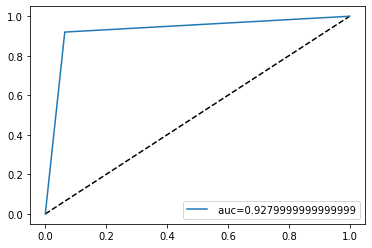

In [30]:
# fit Decision tree to the training set 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
#Create decison tree Classifier
dtree = DecisionTreeClassifier()

#Train the model using the training sets
dtree.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dtree.predict(X_test)
y_pred_prob = dtree.predict_proba(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
accscore_arr.append(acc_score)
accscore_model.append('All Features Decison Tree')
print("accuracy score for decistion tree with all features: \n",confusion_matrix)
print ("accuracy score = ",round(acc_score*100,2),"%")

########## Drawing the AUC curves ###########
y_pred_proba = y_pred_prob[:,1]
#y_pred_proba = y_pred
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
aucscore_arr.append(auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

# accuracy  measure with selected  features for non tuned decision tree

In [31]:

from sklearn.model_selection import train_test_split
tmp_df = df_final_data_1.loc[:, ['Daily Time Spent on Site' ,'Age' , 'Area Income' , 'Daily Internet Usage' ]]
tmp_df=np.array(tmp_df)
X_train, X_test, y_train, y_test = train_test_split(tmp_df, y, test_size = 0.25, random_state = 1 , stratify=y)

accuracy score for decistion tree with selected features: 
 [[115  10]
 [  7 118]]
accuracy score =  93.2 %


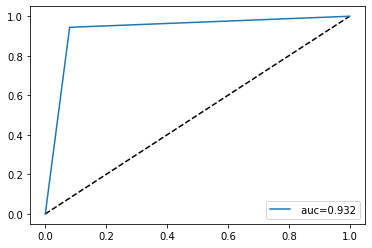

In [32]:
# fit Decision tree to the training set 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
#Create decison tree Classifier
dtree = DecisionTreeClassifier()

#Train the model using the training sets
dtree.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dtree.predict(X_test)
y_pred_prob = dtree.predict_proba(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
accscore_arr.append(acc_score)
accscore_model.append('Selected Features Decison Tree')
print("accuracy score for decistion tree with selected features: \n",confusion_matrix)
print ("accuracy score = ",round(acc_score*100,2),"%")

########## Drawing the AUC curves ###########
y_pred_proba = y_pred_prob[:,1]
#y_pred_proba = y_pred
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
aucscore_arr.append(auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

# HyperParameter tuning for decision tree with all features

In [33]:
# importing RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1 , stratify=y)

Fitting 30 folds for each of 1000 candidates, totalling 30000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 10584 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 21784 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 30000 out of 30000 | elapsed:   32.5s finished


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 7}
accuracy score for decision tree with all features and hyperparameter tuning done 
 [[115  10]
 [  7 118]]
accuracy score =  93.2 %


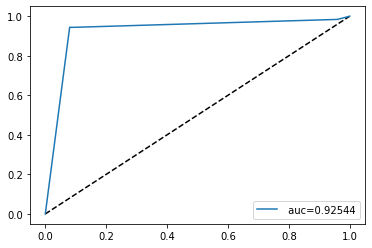

In [34]:
# fit decision tree to the training set 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
#Create decison tree Classifier
dtree = DecisionTreeClassifier()

#grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
#grid_values = {'penalty': ['l1', 'l2']}
# define search space
space = dict()
space['criterion'] = ['gini', 'entropy']
space['max_depth'] = [1,2,3,4,5,6,7,8,9,10]
space['min_samples_split'] = [1,2,3,4,5,6,7,8,9,10]
space['min_samples_leaf'] = [1,2,3,4,5]
grid_clf_acc = GridSearchCV(dtree, space,scoring = 'accuracy' ,cv=cv,n_jobs=-1,verbose = 1)


#Train the model using the training sets
result = grid_clf_acc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = grid_clf_acc.predict(X_test)
y_pred_prob = grid_clf_acc.predict_proba(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
accscore_arr.append(acc_score)
accscore_model.append('Hyper Parameter tuned decision tree with all features')

print('Best Hyperparameters: %s' % result.best_params_)
print("accuracy score for decision tree with all features and hyperparameter tuning done \n",confusion_matrix)
print ("accuracy score = ",round(acc_score*100,2),"%")

########## Drawing the AUC curves ###########
y_pred_proba = y_pred_prob[:,1]
#y_pred_proba = y_pred
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
aucscore_arr.append(auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

# HyperParameter tuning and pre pruning for decision tree with selected features

In [35]:
# importing RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
tmp_df = df_final_data_1.loc[:, ['Daily Time Spent on Site' ,'Age' , 'Area Income' , 'Daily Internet Usage']]
tmp_df=np.array(tmp_df)
X_train, X_test, y_train, y_test = train_test_split(tmp_df, y, test_size = 0.25, random_state = 1 , stratify = y)

Fitting 30 folds for each of 1000 candidates, totalling 30000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 23024 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 30000 out of 30000 | elapsed:   27.5s finished


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 9}
accuracy score for decision tree with selected features and hyperparameter tuning done 
 [[117   8]
 [  8 117]]
accuracy score =  93.6 %


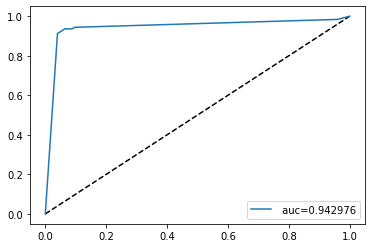

In [36]:
# fit decision tree to the training set 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
#Create decison tree Classifier
dtree = DecisionTreeClassifier()

#grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
#grid_values = {'penalty': ['l1', 'l2']}
# define search space
space = dict()
space['criterion'] = ['gini', 'entropy']
space['max_depth'] = [1,2,3,4,5,6,7,8,9,10]
space['min_samples_split'] = [1,2,3,4,5,6,7,8,9,10]
space['min_samples_leaf'] = [1,2,3,4,5]
grid_clf_acc = GridSearchCV(dtree, space,scoring = 'accuracy' ,cv=cv,n_jobs=-1,verbose = 1)


#Train the model using the training sets
result = grid_clf_acc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = grid_clf_acc.predict(X_test)
y_pred_prob = grid_clf_acc.predict_proba(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
accscore_arr.append(acc_score)
accscore_model.append('Hyper Parameter tuned decision tree with selected features')

print('Best Hyperparameters: %s' % result.best_params_)
print("accuracy score for decision tree with selected features and hyperparameter tuning done \n",confusion_matrix)
print ("accuracy score = ",round(acc_score*100,2),"%")

########## Drawing the AUC curves ###########
y_pred_proba = y_pred_prob[:,1]
#y_pred_proba = y_pred
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
aucscore_arr.append(auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

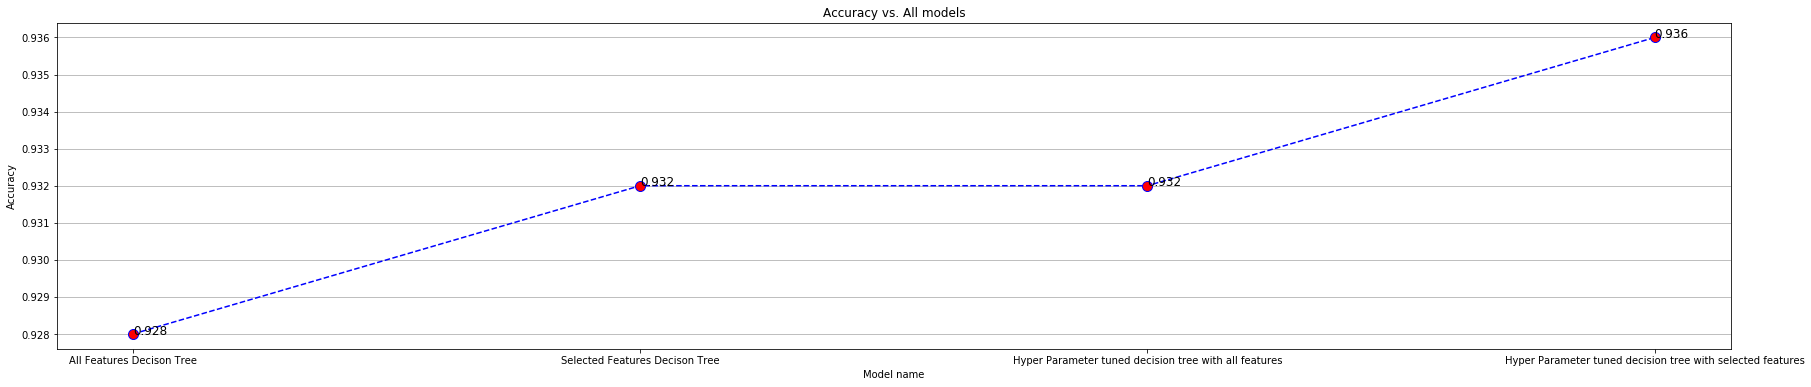

In [37]:
######################### Drawing the best accuracy graph for all the models ###########################

plt.figure(figsize=(30,6))

plt.title('Accuracy vs. All models')
plt.xlabel('Model name')
plt.ylabel('Accuracy')
for i,j in zip(accscore_model,accscore_arr):
    inplot = plt.annotate(str(j)
                          ,xy=(i,j)
                          ,fontsize=12
                          ,color='black')
plt.grid(axis='y', linestyle='-')
plt.plot(accscore_model,accscore_arr,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

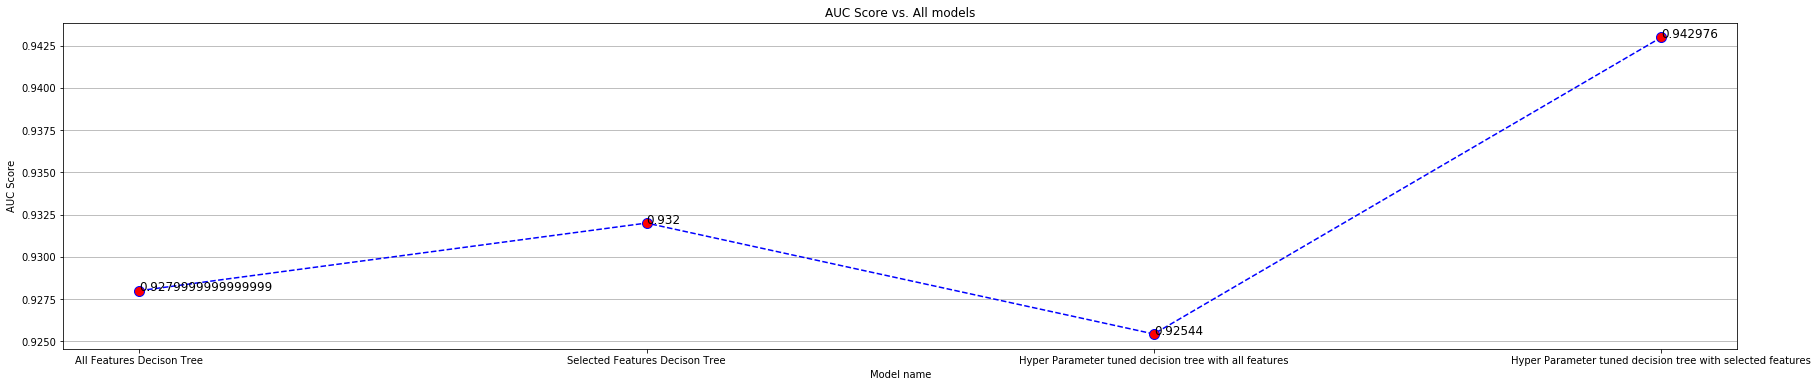

In [38]:
######################### Drawing the best AUC graph for all the models ###########################

plt.figure(figsize=(30,6))

plt.title('AUC Score vs. All models')
plt.xlabel('Model name')
plt.ylabel('AUC Score')
for i,j in zip(accscore_model,aucscore_arr):
    inplot = plt.annotate(str(j)
                          ,xy=(i,j)
                          ,fontsize=12
                          ,color='black')
plt.grid(axis='y', linestyle='-')
plt.plot(accscore_model,aucscore_arr,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

# <font color=Red>From the above we can determine that best accuracy is obtained  for pre pruned hyper parameter tuned decision tree with features selected from filter analysis  , and if we look at AUC then the best AUC is also obtained for the same . Hence we will select that as the best model  </font>

# Best Model - Pre pruned HyperParameter tuned decision tree with filter method based selected features 

In [43]:
# importing RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
tmp_df = df_final_data_1.loc[:, ['Daily Time Spent on Site' ,'Age' , 'Area Income' , 'Daily Internet Usage']]
tmp_df=np.array(tmp_df)
X_train, X_test, y_train, y_test = train_test_split(tmp_df, y, test_size = 0.25, random_state = 1 , stratify = y)

accuracy score for decision tree with selected features and hyperparameter tuning done 
 [[117   8]
 [  8 117]]
accuracy score =  93.6 %


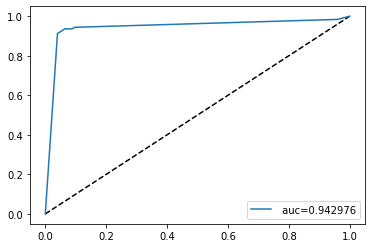

In [44]:
# fit decision tree to the training set 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
#Create decison tree Classifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth= 5, min_samples_leaf=1, min_samples_split = 9)

#grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
#grid_values = {'penalty': ['l1', 'l2']}
# define search space
#space = dict()
#space['criterion'] = ['gini', 'entropy']
#space['max_depth'] = [1,2,3,4,5,6,7,8,9,10]
#space['min_samples_split'] = [1,2,3,4,5,6,7,8,9,10]
#space['min_samples_leaf'] = [1,2,3,4,5]
#grid_clf_acc = GridSearchCV(dtree, space,scoring = 'accuracy' ,cv=cv,n_jobs=-1,verbose = 1)


#Train the model using the training sets
result = dtree.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dtree.predict(X_test)
y_pred_prob = dtree.predict_proba(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
#accscore_arr.append(acc_score)
#accscore_model.append('Hyper Parameter tuned decision tree with selected features')

#print('Best Hyperparameters: %s' % result.best_params_)
print("accuracy score for decision tree with selected features and hyperparameter tuning done \n",confusion_matrix)
print ("accuracy score = ",round(acc_score*100,2),"%")

########## Drawing the AUC curves ###########
y_pred_proba = y_pred_prob[:,1]
#y_pred_proba = y_pred
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
#aucscore_arr.append(auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

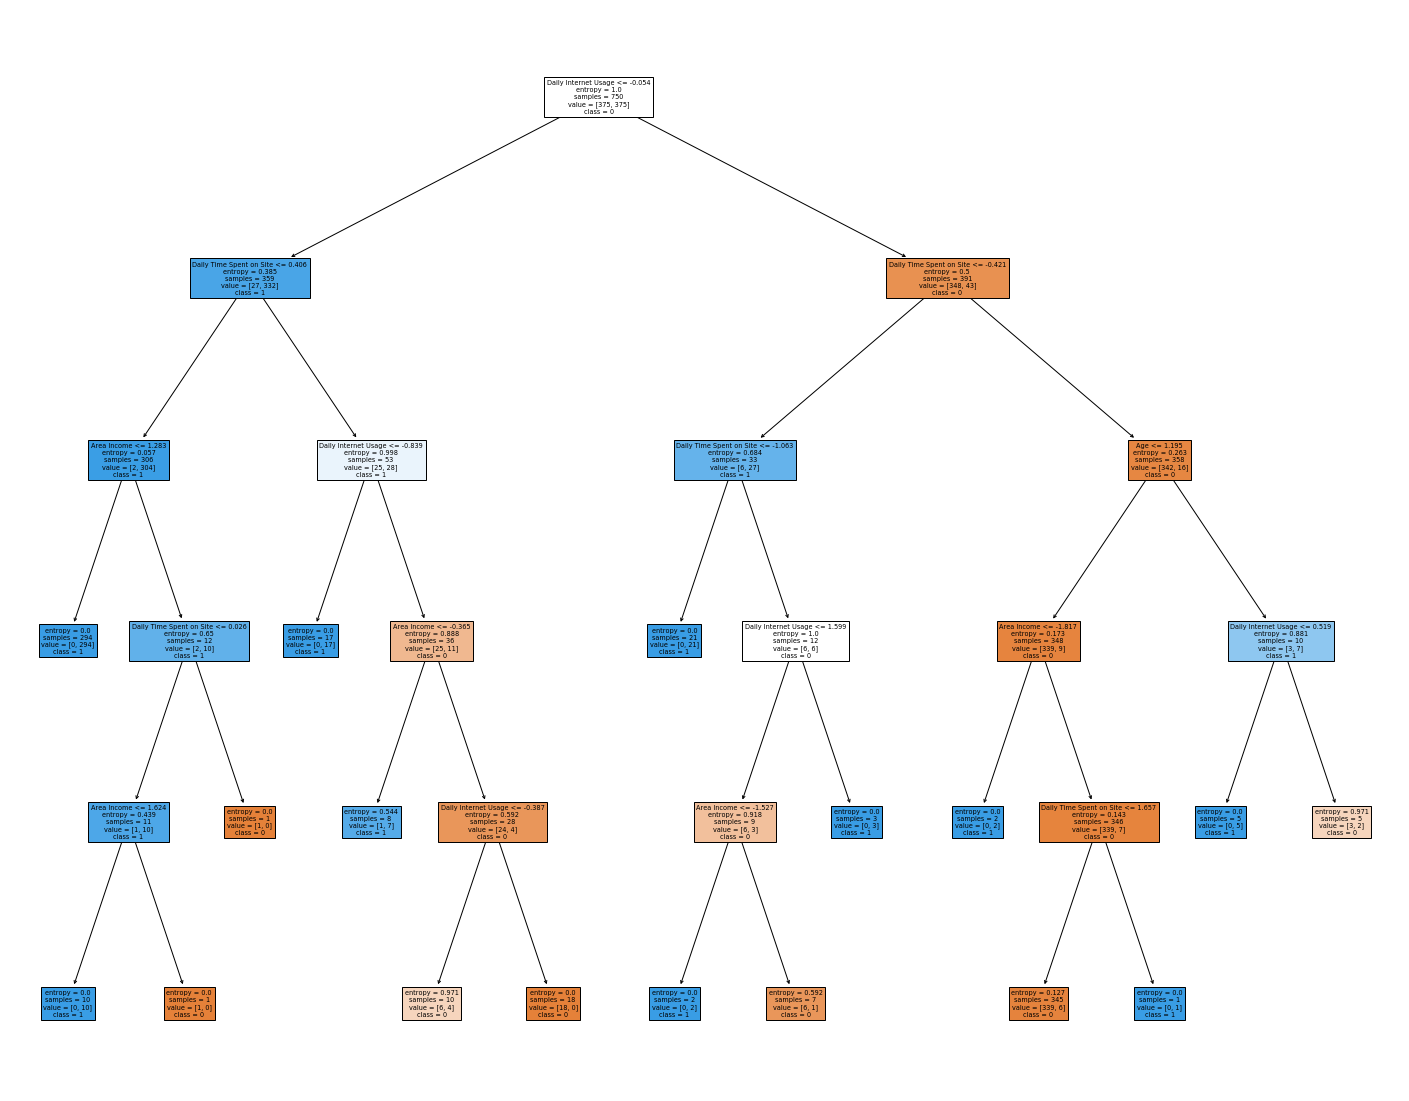

In [45]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=['Daily Time Spent on Site' ,'Age' , 'Area Income' , 'Daily Internet Usage'],  
                   class_names=['0','1'],
                   filled=True)

In [46]:
endTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())
print ("Run started at : ",startTime)
print ("Run ended at : ",endTime)

Run started at :  Fri, 26 Feb 2021 16:52:52 +0000
Run ended at :  Fri, 26 Feb 2021 16:55:42 +0000


<font color="Red" size=5> Conclusion - We selected the Pre pruned HyperParameter tuned decision tree with features selected from filter as the best model and it gives an accuracy of 93.6% but an AUC of 0.94 </font>